In [17]:
import sys
import os
#os.environ['TRANSFORMERS_CACHE'] = '/mnt/swordfish-pool2/milad/hf-cache'
#os.environ['HF_DATASETS_CACHE'] = '/mnt/swordfish-pool2/milad/hf-cache'
os.environ['OPENAI_API_KEY'] = 'zTbZNk16Ik1pZnqLn38ZT3BlbkFJImq3pd7widkr7RzsC771'
os.environ['CUDA_VISIBLE_DEVICES'] = '5'

sys.path.append('/local/nlp/milad/code/explainability-of-art-images/')


In [38]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from transformers.generation import GenerationConfig
import torch
from IPython.display import Image

import utils

In [19]:
tokenizer = AutoTokenizer.from_pretrained("Qwen/Qwen-VL", trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    "Qwen/Qwen-VL", 
    device_map="cuda", 
    trust_remote_code=True
).eval()

The model is automatically converting to bf16 for faster inference. If you want to disable the automatic precision, please manually add bf16/fp16/fp32=True to "AutoModelForCausalLM.from_pretrained".
Loading checkpoint shards: 100%|█████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.56it/s]


In [20]:
query = tokenizer.from_list_format([
    {'image': 'https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg'},
    {'text': 'Generate the caption in English with grounding:'},
])
inputs = tokenizer(query, return_tensors='pt')
inputs = inputs.to(model.device)

In [34]:
pred = model.generate(**inputs)
response = tokenizer.decode(pred.cpu()[0], skip_special_tokens=False)
print(response)

Picture 1: <img>https://qianwen-res.oss-cn-beijing.aliyuncs.com/Qwen-VL/assets/demo.jpeg</img>
Generate the caption in English with grounding:<ref> woman</ref><box>(446,378),(729,806)</box> playing with<ref> her dog</ref><box>(216,423),(578,898)</box> on the beach<|endoftext|>


In [37]:
image = tokenizer.draw_bbox_on_latest_picture(response)
image.save('2.jpg')

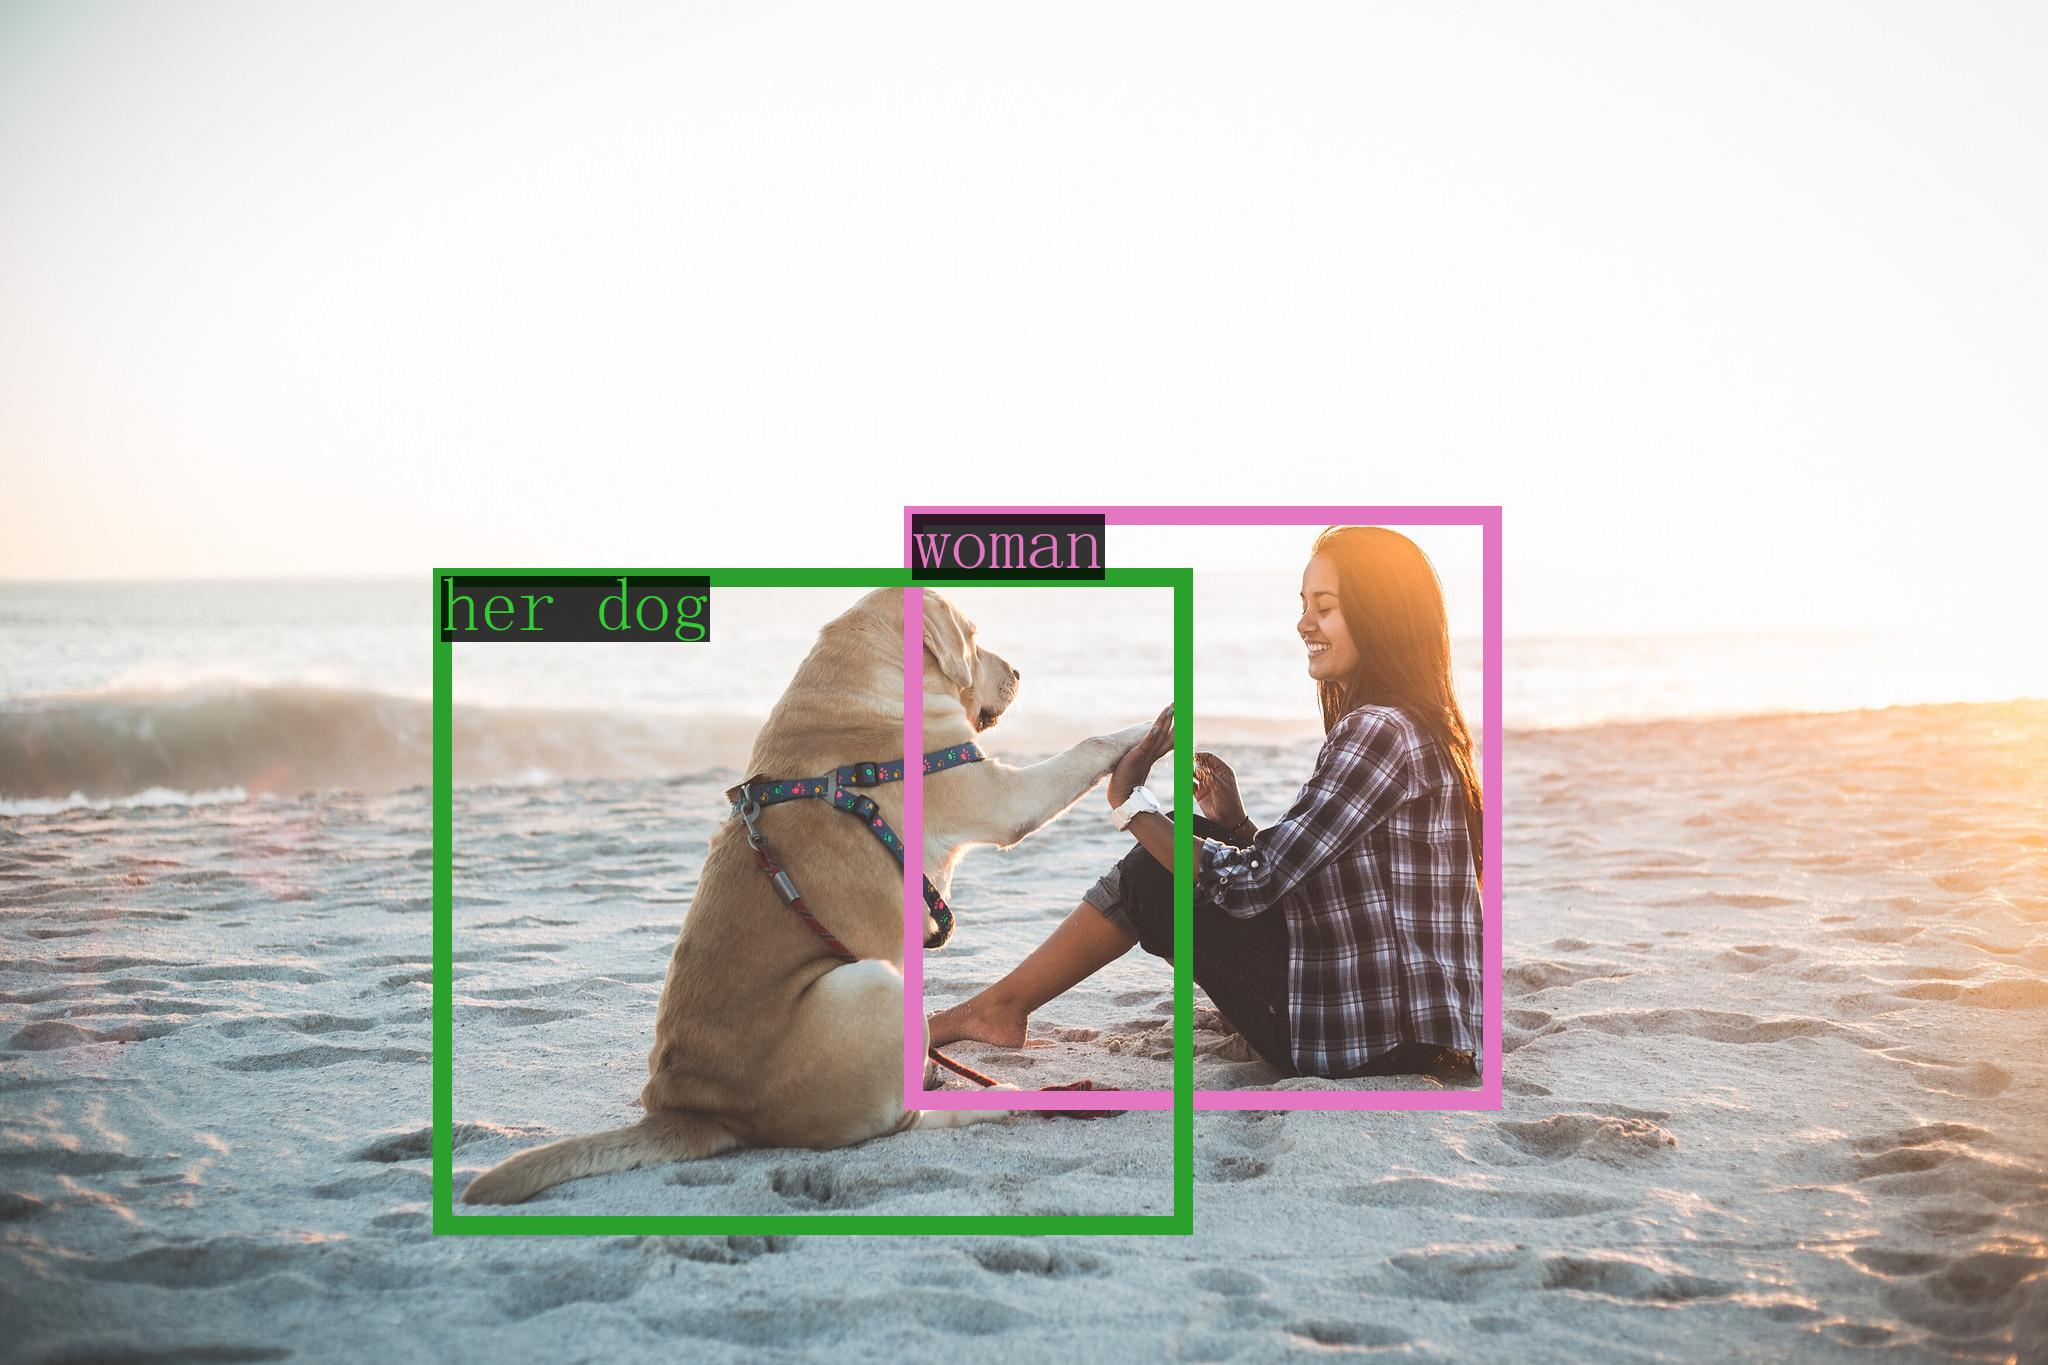

In [39]:
Image(filename='2.jpg')